In [4]:
#Phase 2

#Use KMeans algorithm (do not use column CLASS) 

import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

#continue working with cleaned breast cancer data from the phase 1

df = pd.read_csv("data/Breast-Cancer-Wisconsin.csv") 
df["A7"] = df["A7"].replace('?', np.NaN) #Replace ? by NaN in column A7
df["A7"] = pd.to_numeric(df['A7']) #Apply pandas function pd.to_numeric() for column A7
df = df.fillna(df["A7"].mean(skipna=True)) #Replace NaN values with the mean of column A7

In [7]:
new_df = df.loc[:, 'A2':'A10'] #use only columns A2-A10

from sklearn.cluster import KMeans #import KMeans - use sklearn.cluster

X = np.array(new_df)
kmeans = KMeans(n_clusters=4) #create KMeans model for n_cluster = 4

kmeans.fit(X) #fit model to your data 

centroids = kmeans.cluster_centers_  #calculate centroids

print(centroids) # print centroids


[[ 7.27083333  4.85416667  5.03125     4.78125     4.08333333  9.26609017
   5.26041667  3.76041667  1.65625   ]
 [ 2.94493392  1.24449339  1.36563877  1.29295154  2.03964758  1.3514006
   2.06167401  1.20044053  1.07709251]
 [ 6.7625      8.3875      8.425       7.75        6.775       9.2125
   7.375       7.7375      3.7875    ]
 [ 7.42028986  7.08695652  6.73913043  4.28985507  5.62318841  3.44397055
   5.39130435  6.94202899  2.31884058]]


In [8]:
#Find the optimal number of clusters

inertias_values = []
K = range(1,15) #create a range from 1 to 15 or more
for k in K: #use for loop to calculate KMeans for each values
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias_values.append(kmeanModel.inertia_)

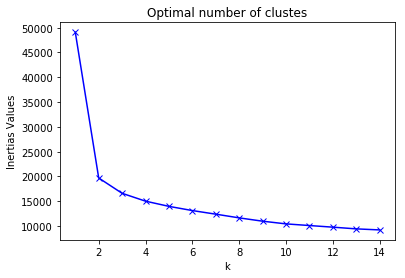

In [9]:
plt.plot(K, inertias_values, 'bx-') #plot range and inertia
plt.xlabel('k')
plt.ylabel('Inertias Values')
plt.title('Optimal number of clustes')
plt.show()

In [10]:
print ("Optimal number of clustes based on the inertia plot is: 2") #specify the optimal number of clustes based on the inertia plot

Optimal number of clustes based on the inertia plot is: 2


In [11]:
#Revise data variation

new_df_std = new_df.std () #apply standard deviation function for columns A2-A10